In [1]:
import gensim
import numpy as np
import multiprocessing
import glob
import re
import nltk
import io
import matplotlib.pyplot as plt
from pprint import pprint
import os
from sklearn.manifold import TSNE
import logging
import seaborn as sns
import pandas as pd
%pylab inline
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /home/carnd/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/carnd/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
book_names = sorted(glob.glob('final_data/*.txt'))
pprint(book_names)

['final_data/book1.txt',
 'final_data/book2.txt',
 'final_data/book3.txt',
 'final_data/book4.txt',
 'final_data/book5.txt',
 'final_data/book6.txt',
 'final_data/book7.txt']


In [6]:
potter_corpus = u''
for book_name in book_names:
    with io.open(book_name, 'r', encoding='utf-8') as file:
        potter_corpus += file.read()
    potter_corpus += ' '
pprint(potter_corpus[:500])

('the boy who lived mr. and mrs. dursley of number four privet drive were '
 'proud to say that they were perfectly normal thank you very much. they were '
 'the last people you’d expect to be involved in anything strange or '
 'mysterious because they just didn’t hold with such nonsense. mr. dursley was '
 'the director of a firm called grunnings which made drills. he was a big '
 'beefy man with hardly any neck although he did have a very large mustache. '
 'mrs. dursley was thin and blonde and had nearly twice the usu')


In [7]:
pprint(len(potter_corpus))

6164634


In [8]:
sentences = nltk.sent_tokenize(potter_corpus)

In [9]:
def wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [10]:
split_sentences = []
for sent in sentences:
    split_sentences.append(wordlist(sent))

In [11]:
split_sentences[1]

['they',
 'were',
 'the',
 'last',
 'people',
 'you',
 'd',
 'expect',
 'to',
 'be',
 'involved',
 'in',
 'anything',
 'strange',
 'or',
 'mysterious',
 'because',
 'they',
 'just',
 'didn',
 't',
 'hold',
 'with',
 'such',
 'nonsense']

In [12]:
total_words = 0
for sent in split_sentences:
    total_words += len(sent)

print('Total number of words in dataset:', total_words)

Total number of words in dataset: 1122896


In [13]:
sum([len(sentence) for sentence in sentences])

6104613

In [16]:
num_features = 300
skip_gram = 1
workers = multiprocessing.cpu_count()

In [17]:
bigram_transformer = gensim.models.Phrases(split_sentences)

2017-05-31 19:08:07,765 : INFO : collecting all words and their counts
2017-05-31 19:08:07,766 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2017-05-31 19:08:08,089 : INFO : PROGRESS: at sentence #10000, processed 158774 words and 77935 word types
2017-05-31 19:08:08,408 : INFO : PROGRESS: at sentence #20000, processed 314499 words and 129759 word types
2017-05-31 19:08:08,745 : INFO : PROGRESS: at sentence #30000, processed 478010 words and 175021 word types
2017-05-31 19:08:09,161 : INFO : PROGRESS: at sentence #40000, processed 687543 words and 228855 word types
2017-05-31 19:08:09,545 : INFO : PROGRESS: at sentence #50000, processed 880002 words and 273987 word types
2017-05-31 19:08:09,914 : INFO : PROGRESS: at sentence #60000, processed 1064380 words and 314760 word types
2017-05-31 19:08:09,916 : INFO : collected 314851 word types from a corpus of 1064767 words (unigram + bigrams) and 60026 sentences
2017-05-31 19:08:09,916 : INFO : using 314851 counts as

In [18]:
potter2vec = gensim.models.word2vec.Word2Vec(bigram_transformer[split_sentences], workers=workers, sg=skip_gram, iter=10)

/home/carnd/anaconda3/lib/python3.5/site-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")
2017-05-31 19:08:09,961 : INFO : collecting all words and their counts
2017-05-31 19:08:09,962 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-05-31 19:08:10,950 : INFO : PROGRESS: at sentence #10000, processed 157272 words, keeping 10113 word types
2017-05-31 19:08:11,919 : INFO : PROGRESS: at sentence #20000, processed 311091 words, keeping 14012 word types
2017-05-31 19:08:12,928 : INFO : PROGRESS: at sentence #30000, processed 472121 words, keeping 16660 word types
2017-05-31 19:08:14,181 : INFO : PROGRESS: at sentence #40000, processed 676650 words, keeping 19388 word types
2017-05-31 19:08:15,346 : INFO : PROGRESS: at sentence #50000, processed 865526 words, keeping 21457 word types
2017-05-31 1

In [19]:
potter2vec.train(split_sentences, total_examples=sum([len(sentence) for sentence in sentences]), epochs=potter2vec.iter)

2017-05-31 19:08:23,486 : INFO : training model with 8 workers on 10820 vocabulary and 100 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
2017-05-31 19:08:24,510 : INFO : PROGRESS: at 0.07% examples, 606916 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:25,517 : INFO : PROGRESS: at 0.16% examples, 643125 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:26,520 : INFO : PROGRESS: at 0.24% examples, 660694 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:27,522 : INFO : PROGRESS: at 0.33% examples, 666201 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:28,526 : INFO : PROGRESS: at 0.41% examples, 670460 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:29,528 : INFO : PROGRESS: at 0.49% examples, 672419 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:30,530 : INFO : PROGRESS: at 0.57% examples, 676166 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:31,535 : INFO : PROGRESS: at 0.66% examples, 677681 words/s, in_qsize 15, out_qsize 0
2017-05-31 19:08:32,540 : 

8183470

In [20]:
if not os.path.exists("trained_model"):
    os.makedirs("trained_model")

potter2vec.save(os.path.join("trained_model", "potter2vec.w2v"))

2017-05-31 19:08:41,054 : INFO : saving Word2Vec object under trained_model/potter2vec.w2v, separately None
2017-05-31 19:08:41,055 : INFO : not storing attribute syn0norm
2017-05-31 19:08:41,056 : INFO : not storing attribute cum_table
2017-05-31 19:08:41,215 : INFO : saved trained_model/potter2vec.w2v


In [21]:
potter2vec = gensim.models.word2vec.Word2Vec.load(os.path.join("trained_model", "potter2vec.w2v"))

2017-05-31 19:08:49,990 : INFO : loading Word2Vec object from trained_model/potter2vec.w2v
2017-05-31 19:08:50,079 : INFO : loading wv recursively from trained_model/potter2vec.w2v.wv.* with mmap=None
2017-05-31 19:08:50,080 : INFO : setting ignored attribute syn0norm to None
2017-05-31 19:08:50,081 : INFO : setting ignored attribute cum_table to None
2017-05-31 19:08:50,082 : INFO : loaded trained_model/potter2vec.w2v


In [22]:
tsne = TSNE(n_components=2, random_state=0)

In [23]:
all_word_vectors_matrix = potter2vec.wv.syn0

In [24]:
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [25]:
points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[potter2vec.wv.vocab[word].index])
            for word in potter2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [26]:
points.head(10)

,word,x,y
0,darker,-2.034321,2.831937
1,spots,-5.299977,2.462169
2,wormtail,-1.740264,-1.383627
3,gates,-3.950781,2.202398
4,written,-0.085134,2.760278
5,events,1.272800,3.456412
6,palm,-3.822598,-0.870905
7,lean,-0.131180,-0.103191
8,dagger,-4.224285,0.042935
9,illuminated,-4.993441,2.772681


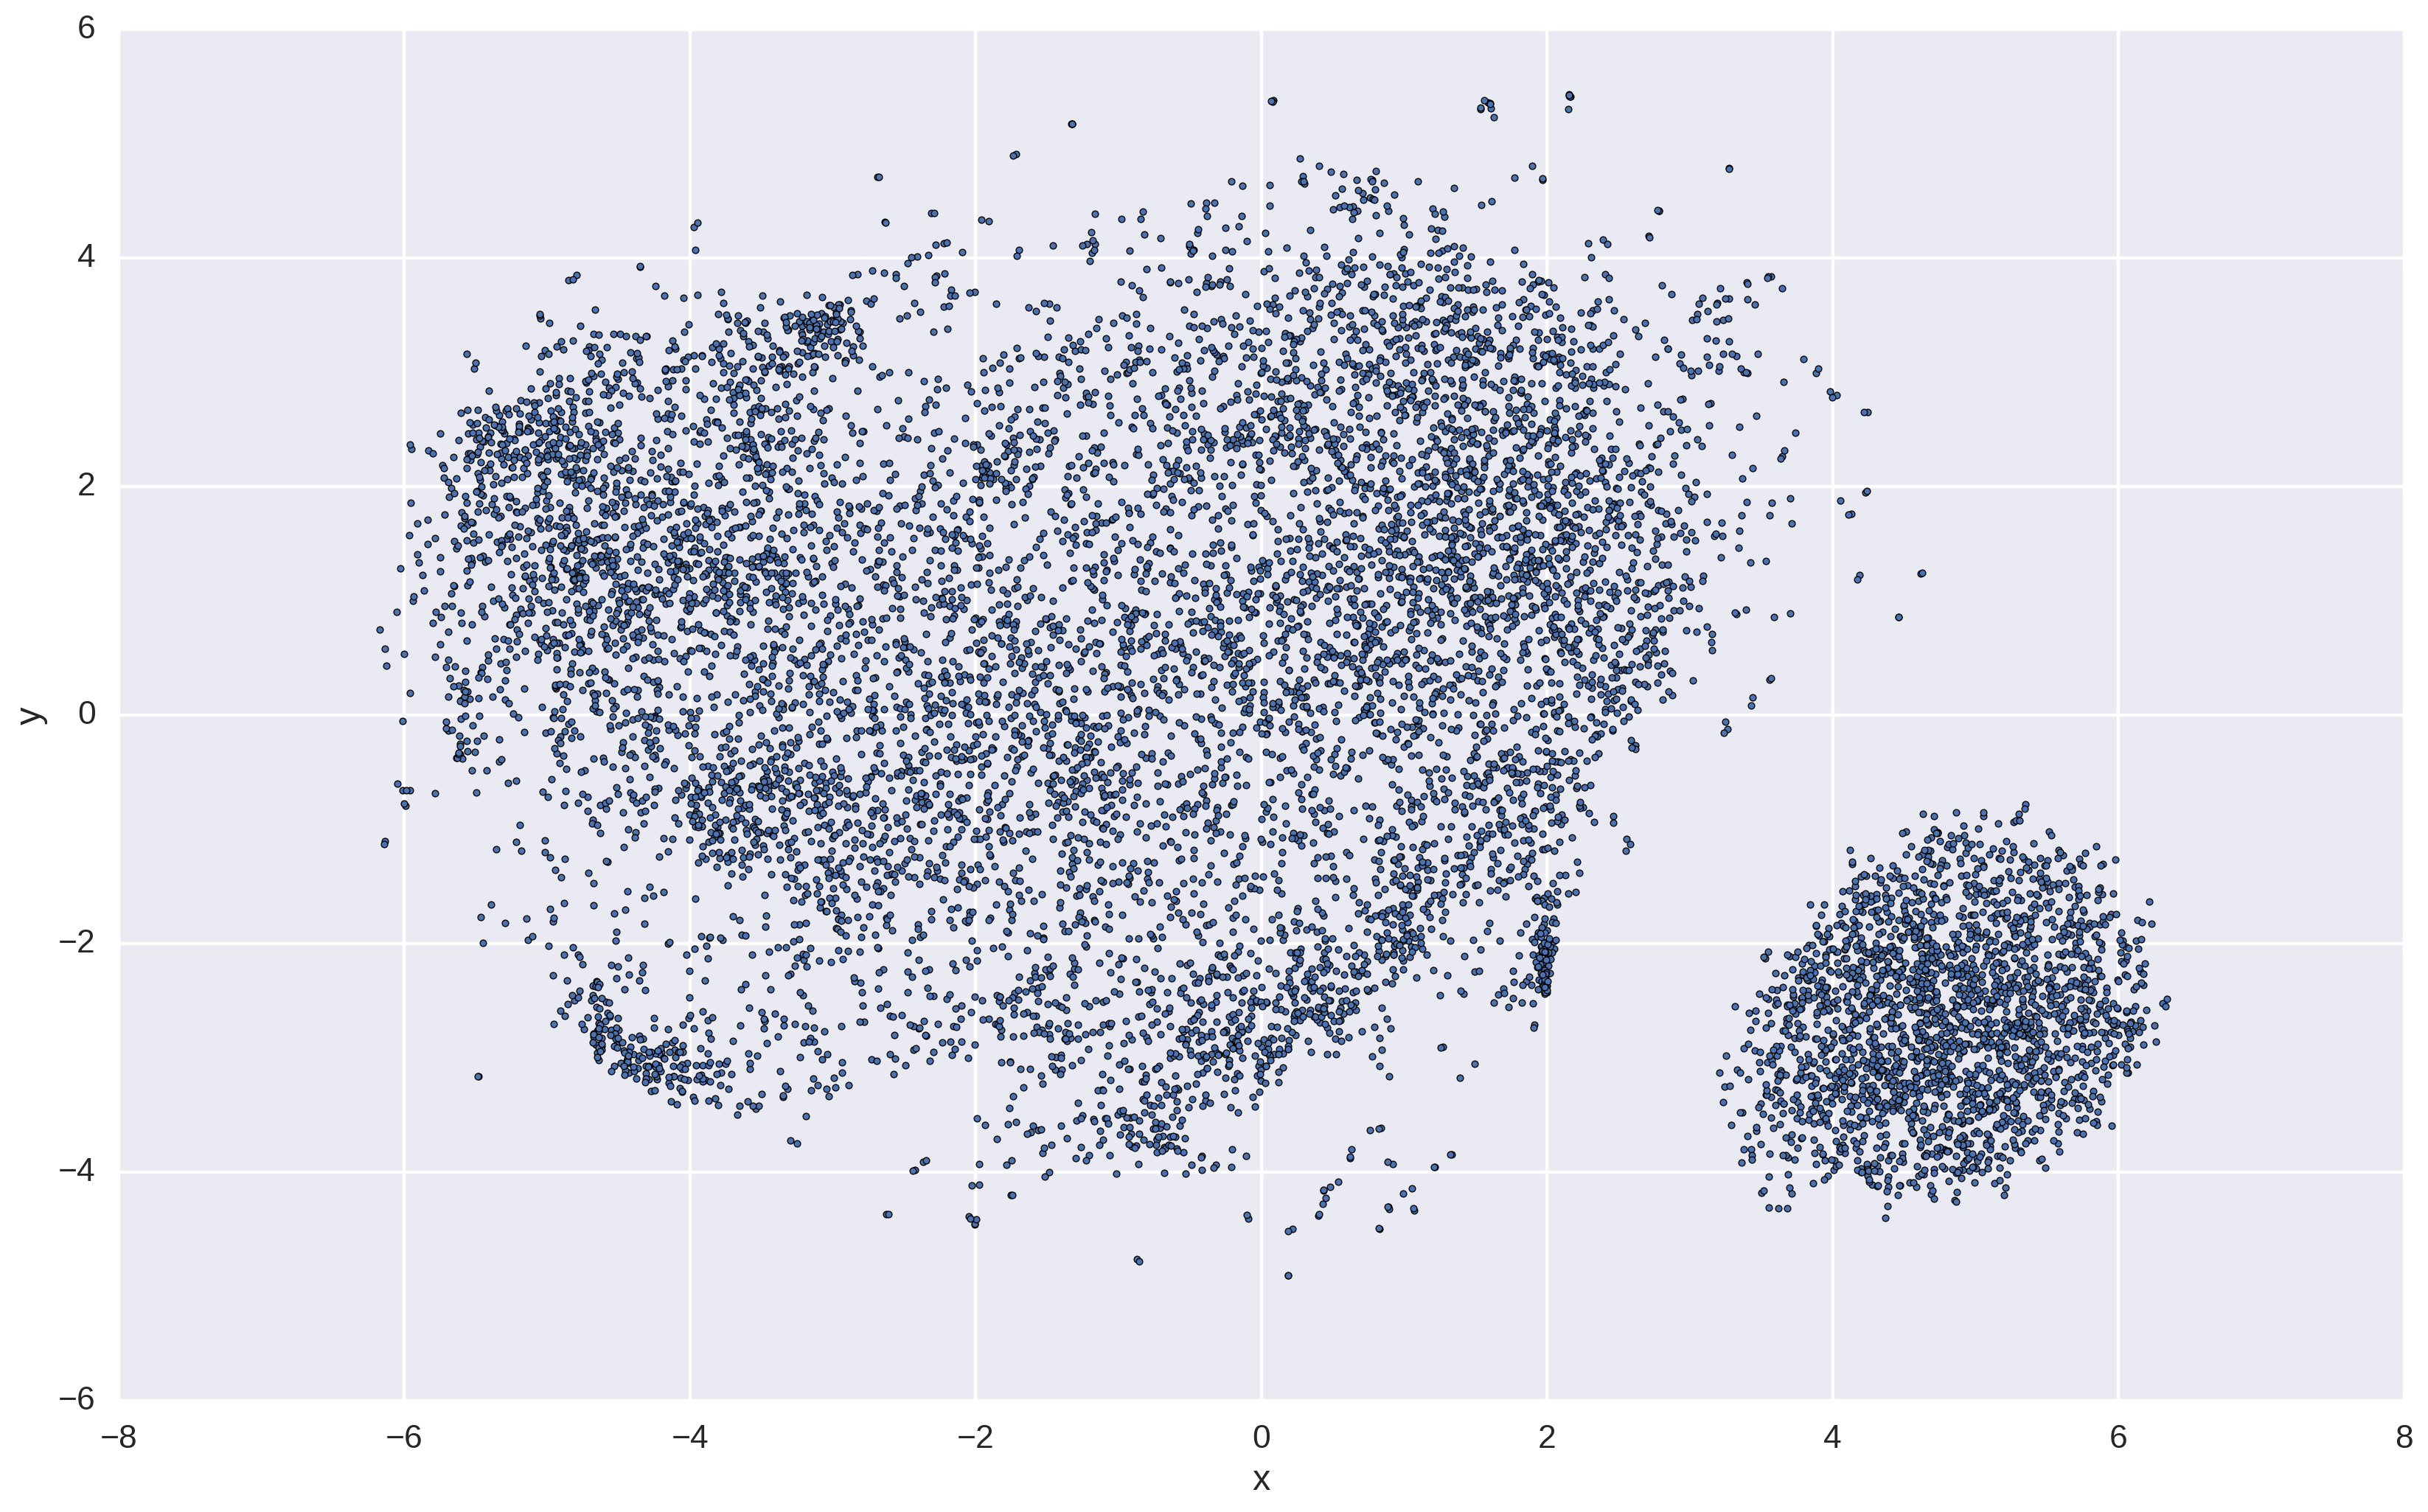

In [27]:
sns.set_context("poster")
points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [28]:
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

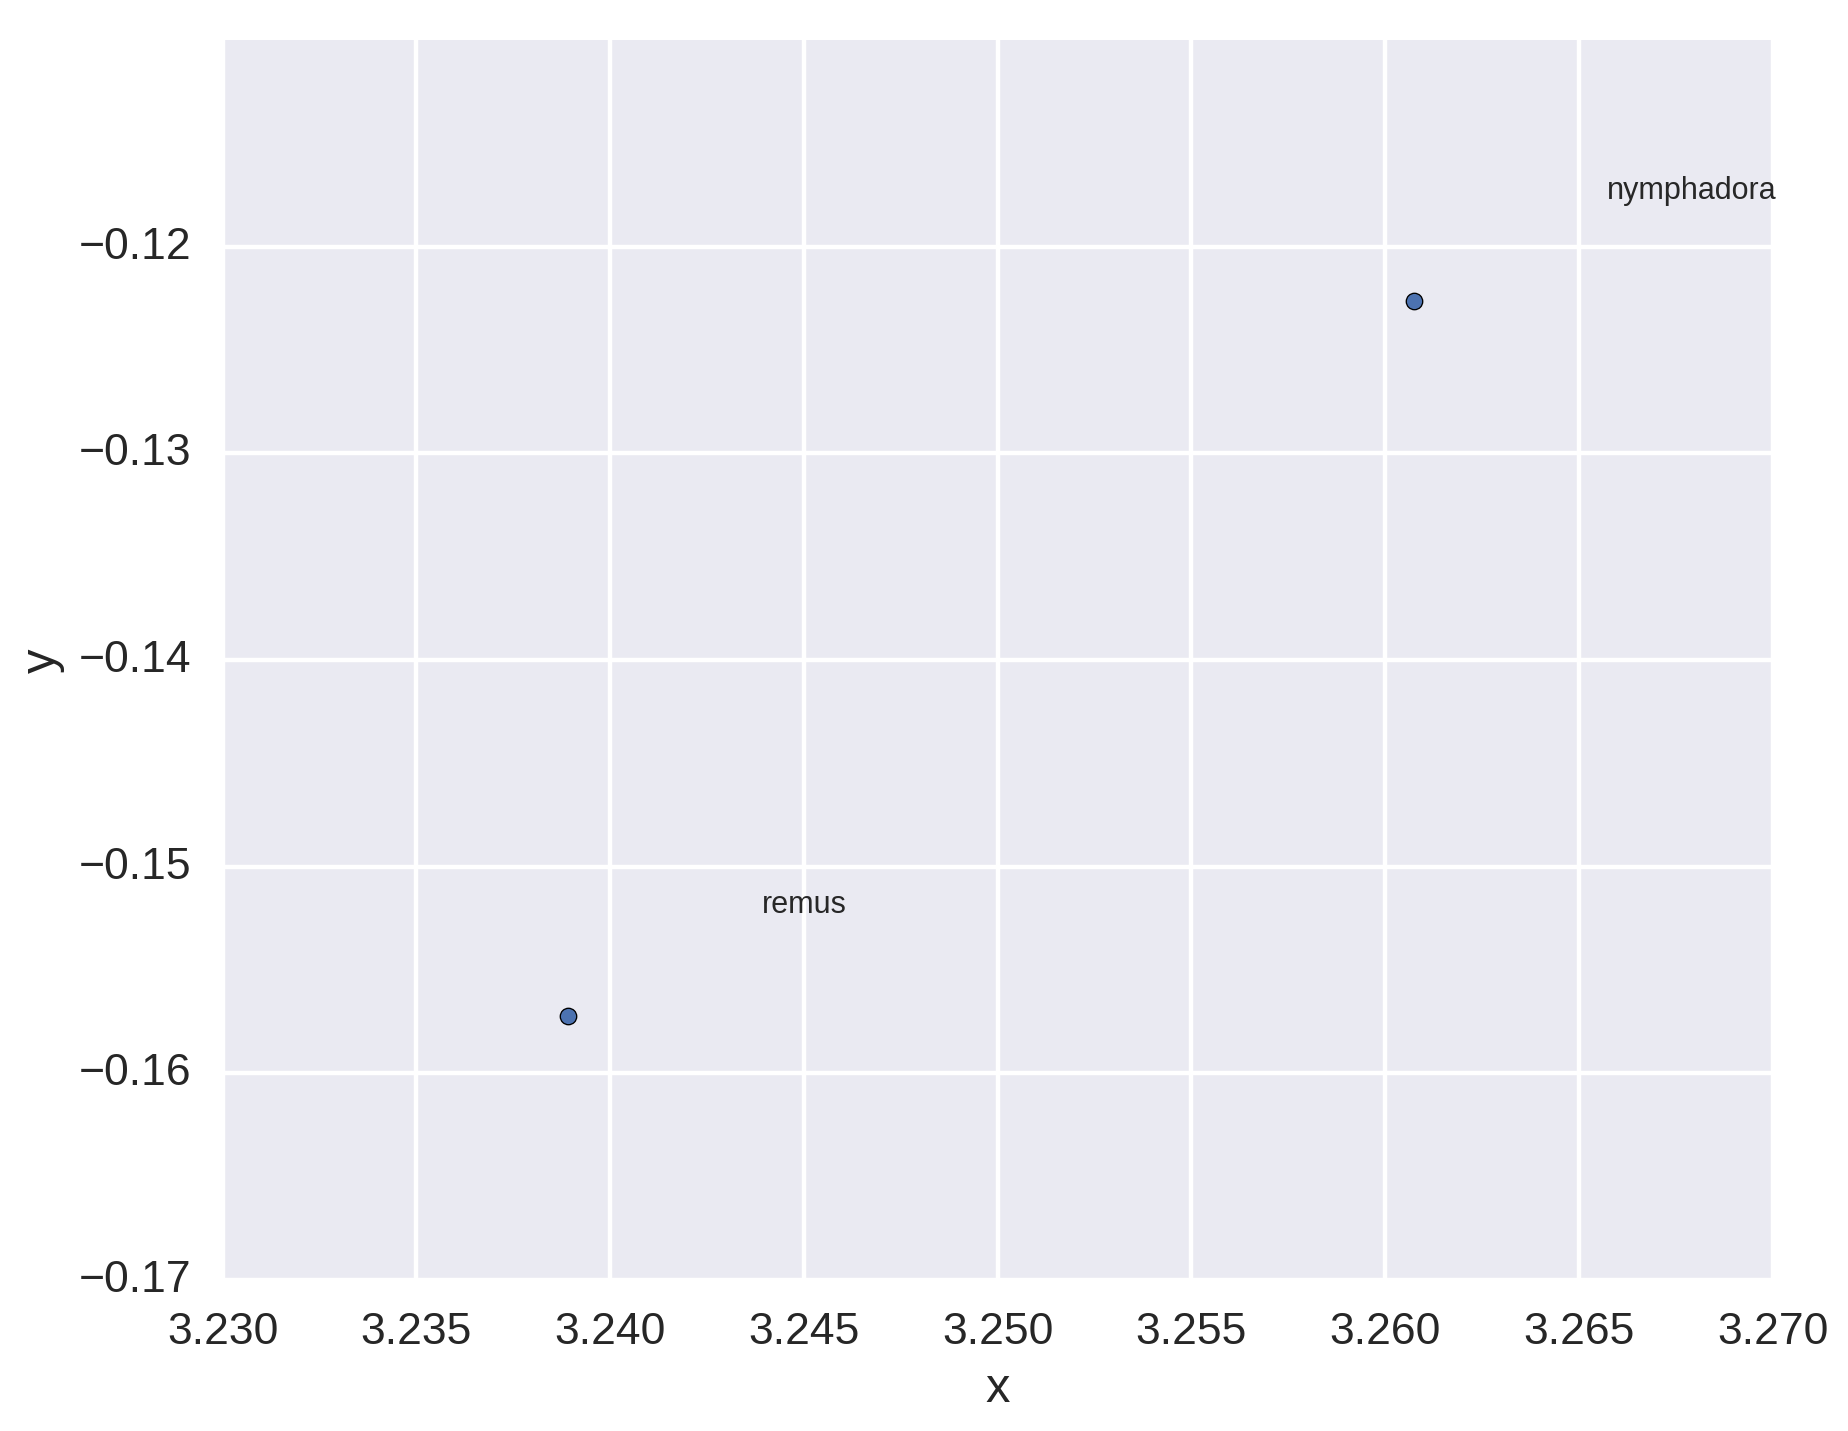

In [33]:
plot_region(x_bounds=(3, 4), y_bounds=(-0.5, -0.1))

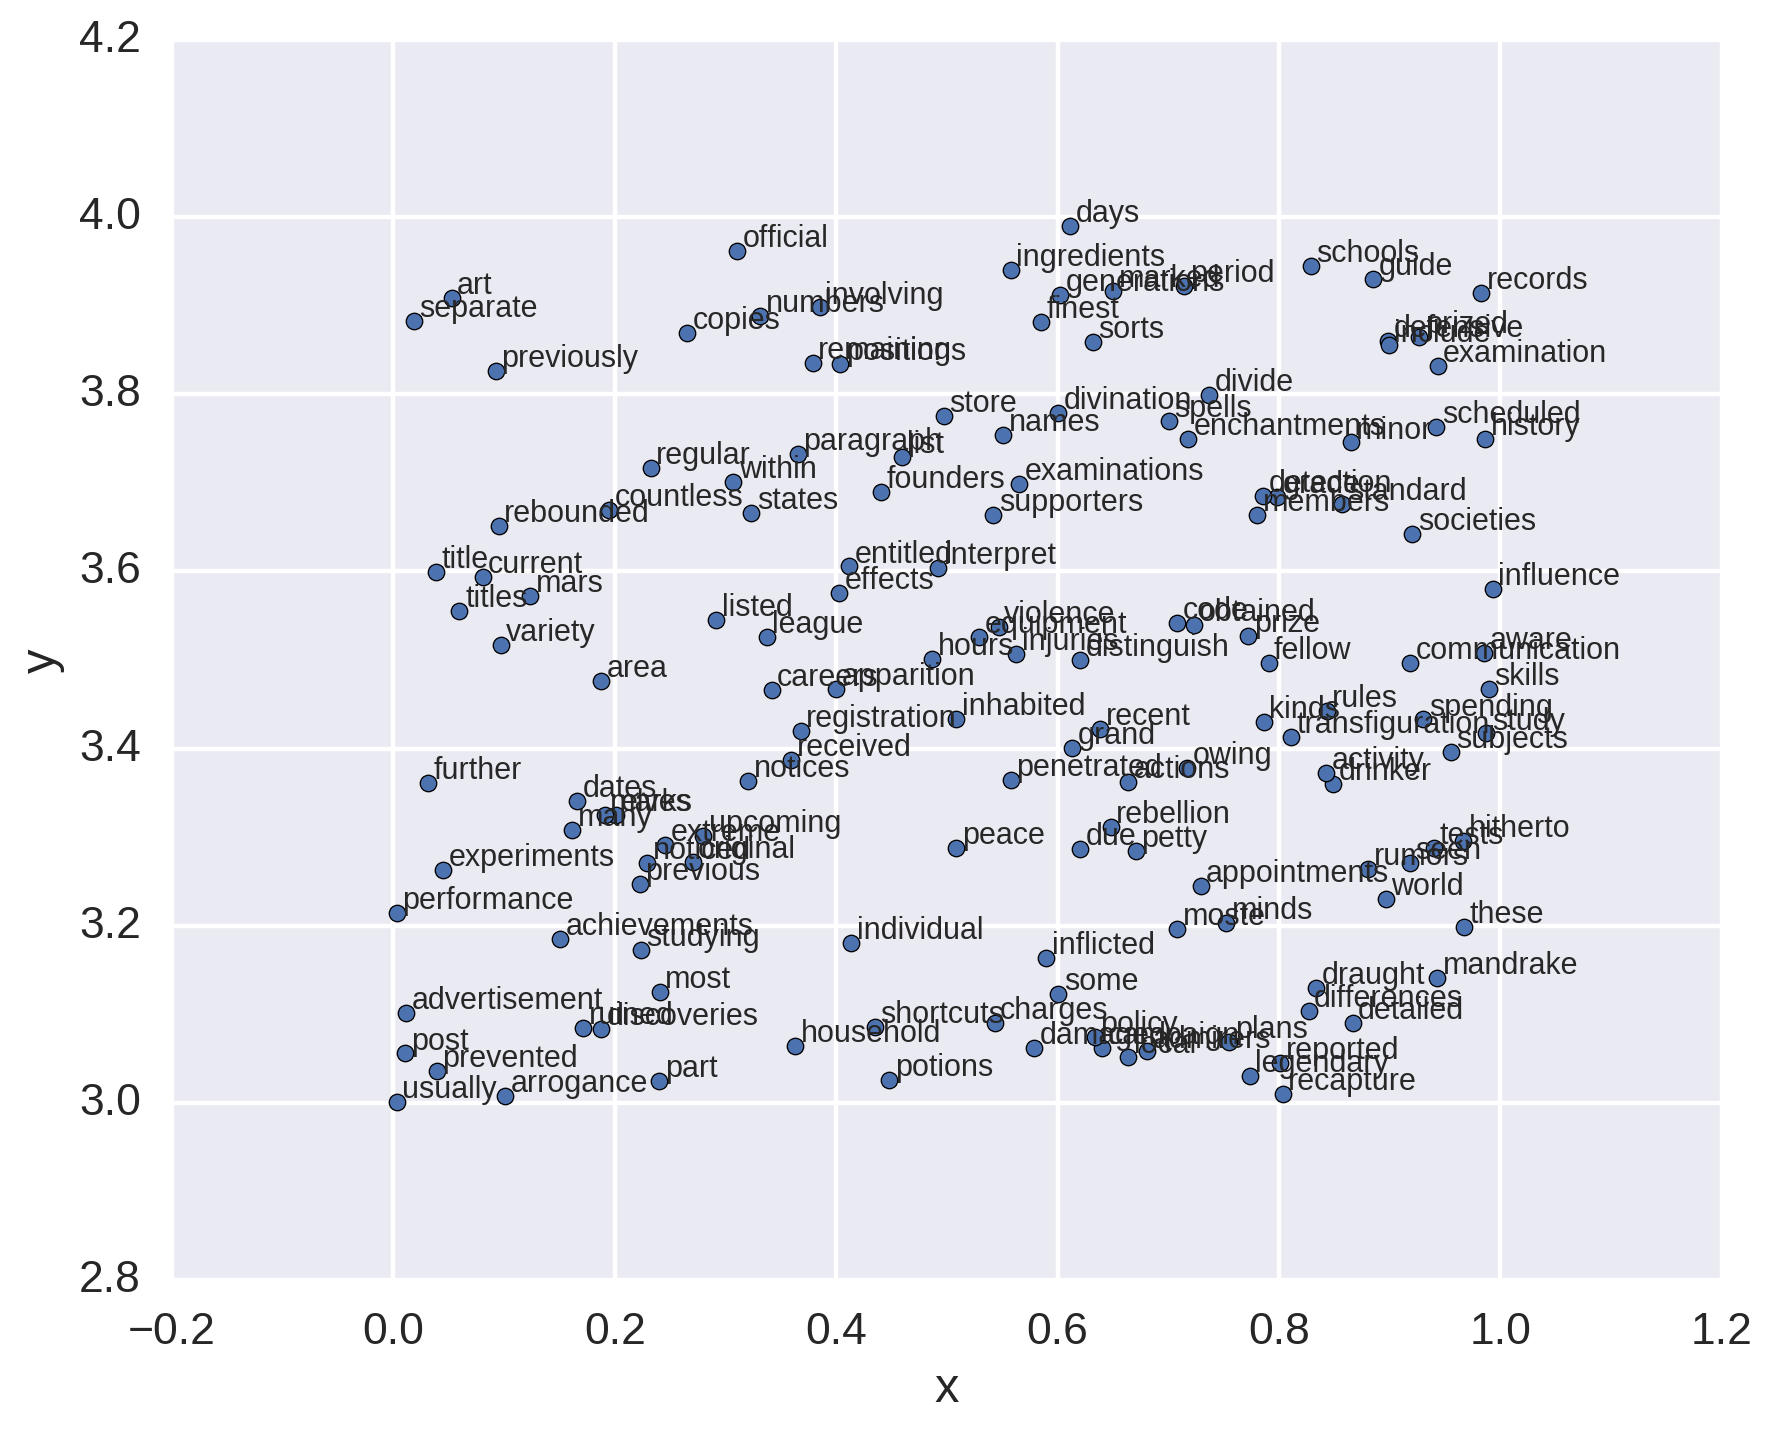

In [34]:
plot_region(x_bounds=(0, 1), y_bounds=(3, 4))

In [35]:
potter2vec.most_similar("horcrux")

2017-05-31 19:12:29,280 : INFO : precomputing L2-norms of word weight vectors


[('wandmaker', 0.5865292549133301),
 ('horcruxes', 0.5713101029396057),
 ('longest', 0.5572130680084229),
 ('hallows', 0.5548444390296936),
 ('locket', 0.550821840763092),
 ('map', 0.5324552059173584),
 ('sorcerer', 0.5299112796783447),
 ('sword', 0.5217224955558777),
 ('debating', 0.5204775929450989),
 ('seek', 0.5169311761856079)]

In [36]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = potter2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [37]:
nearest_similarity_cosmul("harry", "brave", "ron")

harry is related to brave, as hermione is related to ron


'hermione'